In [0]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf


In [2]:
data = pd.read_csv('http://iali.in/datasets/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
data.info

<bound method DataFrame.info of      class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]>

checking whether dataset contains any null values

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

checking the no of target classes

In [6]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

converting the data in numeric form


In [0]:
transformed_data=data.apply(LabelEncoder().fit_transform)

In [8]:
transformed_data.drop(columns=['class']).corrwith(transformed_data)

cap-shape                   1.0
cap-surface                 1.0
cap-color                   1.0
bruises                     1.0
odor                        1.0
gill-attachment             1.0
gill-spacing                1.0
gill-size                   1.0
gill-color                  1.0
stalk-shape                 1.0
stalk-root                  1.0
stalk-surface-above-ring    1.0
stalk-surface-below-ring    1.0
stalk-color-above-ring      1.0
stalk-color-below-ring      1.0
veil-type                   NaN
veil-color                  1.0
ring-number                 1.0
ring-type                   1.0
spore-print-color           1.0
population                  1.0
habitat                     1.0
class                       NaN
dtype: float64

In [0]:
X = transformed_data.drop(columns=['class'])
Y = transformed_data['class']


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [22]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
predicted = clf.predict(x_test)
accuracy_score(y_test,predicted)

1.0

printing the heatmap of confusion matrix


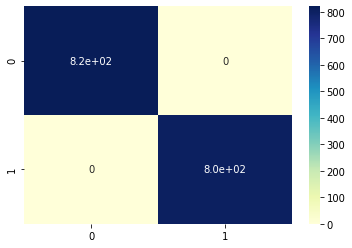

In [32]:
con1=confusion_matrix(y_test,predicted)
sns.heatmap(con1,annot=True,cmap="YlGnBu")

In [31]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# using neural networks
The accuracy of above model is 100% which may mean that the model is overfitting. to eleiminate it we will make another model , this time a neural network and add the noise in data in the network.I have also added a dropout layer for avoiding overfitting.

In [0]:
ann=tf.keras.models.Sequential([
                            tf.keras.layers.Dense(8,activation='relu',input_dim=22),
                            tf.keras.layers.GaussianNoise(0.01),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(16,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')

])

ann.compile(optimizer='adam',metrics='accuracy',loss='binary_crossentropy')

In [60]:
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
204/204 [==============================] - 1s 3ms/step - loss: 0.7103 - accuracy: 0.6039
Epoch 2/10
204/204 [==============================] - 1s 3ms/step - loss: 0.5089 - accuracy: 0.7530
Epoch 3/10
204/204 [==============================] - 1s 3ms/step - loss: 0.4261 - accuracy: 0.8155
Epoch 4/10
204/204 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8451
Epoch 5/10
204/204 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8557
Epoch 6/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2933 - accuracy: 0.8801
Epoch 7/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2737 - accuracy: 0.8868
Epoch 8/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2470 - accuracy: 0.8924
Epoch 9/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2158 - accuracy: 0.9083
Epoch 10/10
204/204 [==============================] - 1s 3ms/step - loss: 0.1989 - accuracy: 0.9198

In [61]:
y_pred=ann.predict(x_test)
y_pred = (y_pred > 0.5)
accuracy_score(y_test,y_pred)

0.9593846153846154

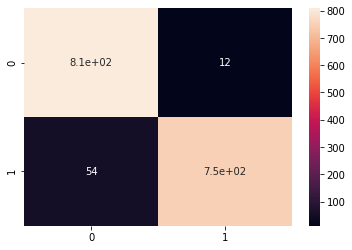

In [62]:
con2 = confusion_matrix(y_test,y_pred)
sns.heatmap(con2,annot=True)


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       820
           1       0.98      0.93      0.96       805

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

